<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A19_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1. Explain the hyperparameters required for the Random Forest algorithm

In random forest, the hyperparameters are the number of trees, number of features and the type of trees. It is essential for any Random Forest models because those are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. 

Question 2. How is Random Forest different from a single decision tree?

In short, A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results 

Question 3. Why is it important to assess machine learning models using withheld
validation data as opposed to the data points used to train the model?

The prediction of nominal variables are assessed using the withheld testing or validation data because it is important not to use the trained or used data. Those used datasets have no way of verifying that our model learned real patterns in the data, and it could results in overly optimistic metrics on model’s performance because the model has already seen the data and knows exactly how to handle it. Therefore, we can reduce the bias and errors by using the withheld dataset to check how well a model will perform on the new dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import cohen_kappa_score as kap
from sklearn.metrics import accuracy_score as oa
from sklearn.metrics import classification_report as cp
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import precision_recall_curve as pr 
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2


Task 1. Prepare the data by (1) filtering to create a data table that includes only the
dependent variable (“Satisfaction”) and the independent variables used to predict it:
“Gender”, “Age”, “Customer.Type”, “Type.of.Travel”, “Class”, “Flight.Distance”,
“Departure.Delay”, and “Arrival.Delay”. “Gender”, “Age”, “Customer.Type”,
“Type.of.Travel”, and “Class” should be treated as nominal data. “Flight.Distance”,
“Departure.Delay”, and “Arrival.Delay” should be treated as continuous data.
“Satisfaction” has two levels: "Neutral or Dissatisfied" and "Satisfied". Remove any
rows with missing data in any column

In [ ]:
air= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/airline_passenger_satisfaction.csv")
air.columns
air.columns= [i.replace(" ", "_") for i in air.columns]
air.columns

Index(['ID', 'Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check-in_Service', 'Online_Boarding', 'Gate_Location',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In-flight_Service', 'In-flight_Wifi_Service',
       'In-flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
#Task1
air= air[["Satisfaction", "Gender", "Age", "Customer_Type", "Type_of_Travel", "Class", "Flight_Distance", "Departure_Delay", "Arrival_Delay"]]
air=air.dropna(axis=0)
air

,Satisfaction,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay
0,Neutral or Dissatisfied,Male,48,First-time,Business,Business,821,2,5.0
1,Satisfied,Female,35,Returning,Business,Business,821,26,39.0
2,Satisfied,Male,41,Returning,Business,Business,853,0,0.0
3,Satisfied,Male,50,Returning,Business,Business,1905,0,0.0
4,Satisfied,Female,49,Returning,Business,Business,3470,0,1.0
...,...,...,...,...,...,...,...,...,...
129875,Neutral or Dissatisfied,Male,28,Returning,Personal,Economy Plus,447,2,3.0
129876,Neutral or Dissatisfied,Male,41,Returning,Personal,Economy Plus,308,0,0.0
129877,Neutral or Dissatisfied,Male,42,Returning,Personal,Economy Plus,337,6,14.0
129878,Satisfied,Male,50,Returning,Personal,Economy Plus,337,31,22.0


Task 2. Create grouped bar plots to compare “Satisfaction” to each of the nominal
predictor variables. Describe the results. Which variables seem to be predictive of flight
satisfaction

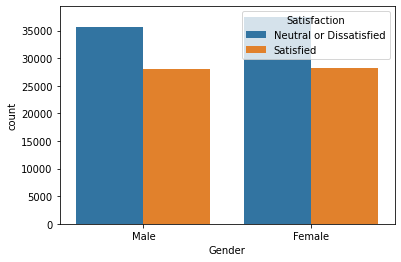

In [ ]:
#Task 2 
sns.countplot(x="Gender", hue="Satisfaction", data= air)

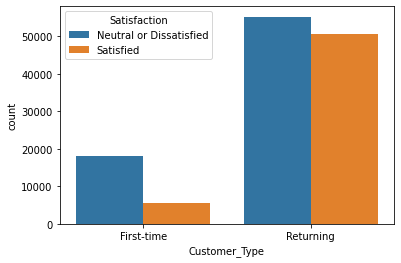

In [ ]:
sns.countplot(x="Customer_Type", hue="Satisfaction", data= air)

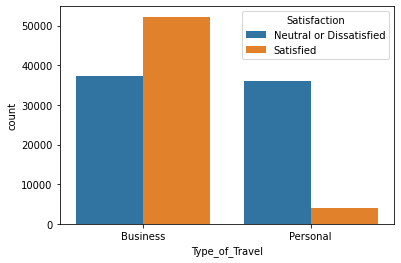

In [ ]:
sns.countplot(x="Type_of_Travel", hue="Satisfaction", data= air)

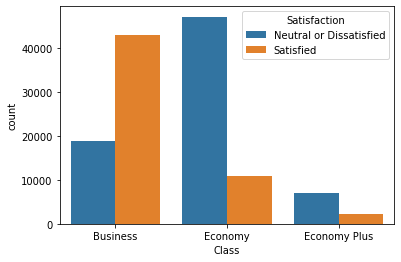

In [ ]:
sns.countplot(x="Class", hue="Satisfaction", data= air)

The overall satisfaction rate really changes for the customer type and we can see a huge difference between first timer and returning customers. The class of tge flight also makes sense to predict the satisfaction since business class usually have way better service for the customers and therefore the satisfaction rate is higher compared to the economy class and economy plus class. 

Task 3 Create grouped boxplots to compare “Satisfaction” to each of the continuous
predictor variables. Describe the results. Which variables seem to be predictive of flight
satisfaction

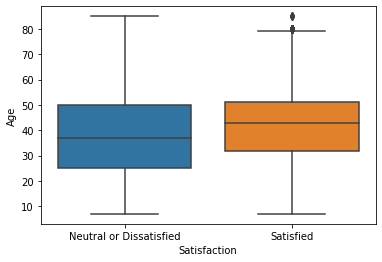

In [ ]:
#Task 3 
sns.boxplot(x="Satisfaction", y= "Age", data= air)

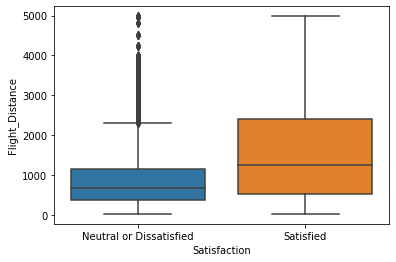

In [ ]:
sns.boxplot(x="Satisfaction", y= "Flight_Distance", data= air)

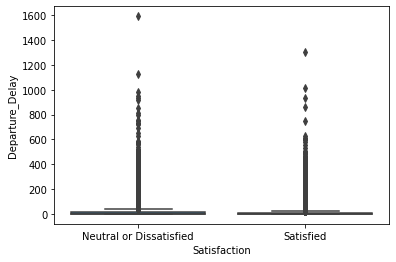

In [ ]:
sns.boxplot(x="Satisfaction", y= "Departure_Delay", data= air)

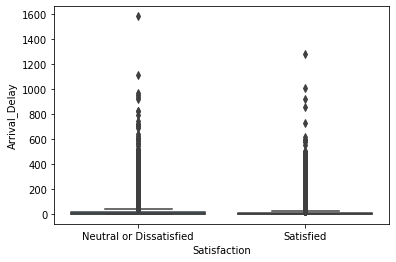

In [ ]:
sns.boxplot(x="Satisfaction", y= "Arrival_Delay", data= air)

From our generated resutls we can see that Age doesn't really affect too much satisfaction rate and stays quite neutrual. The best boxplot that can be observed well to determine the difference is the flight distance category for overall satisfaction. The depature delay and arrival delay have the least satisfaction resutls, but these two boxplots are too difficult to be interpreted. The flight distance is the one that could provide a solid interpretation that longer flight will cause lower satisfaction 

Task 4. Split the data into separate, non-overlapping training and testing sets. 75% of
the data should be used to train the model while 25% should be maintained for
validation. Stratify the partition using the “Satisfaction” variable.

In [ ]:
#task 4 
#add dummie 
gender= pd.get_dummies(air.Gender, prefix= "Gen",drop_first=True)
aclass = pd.get_dummies(air.Class, prefix= "Class",drop_first=True)
ttype= pd.get_dummies(air.Type_of_Travel, prefix= "Type",drop_first=True)
ctype= pd.get_dummies(air.Customer_Type, prefix= "Type",drop_first=True)
air2 = pd.concat([air,gender,aclass,ttype,ctype], axis=1)
air2.head()


,Satisfaction,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Gen_Male,Class_Economy,Class_Economy Plus,Type_Personal,Type_Returning
0,Neutral or Dissatisfied,Male,48,First-time,Business,Business,821,2,5.0,1,0,0,0,0
1,Satisfied,Female,35,Returning,Business,Business,821,26,39.0,0,0,0,0,1
2,Satisfied,Male,41,Returning,Business,Business,853,0,0.0,1,0,0,0,1
3,Satisfied,Male,50,Returning,Business,Business,1905,0,0.0,1,0,0,0,1
4,Satisfied,Female,49,Returning,Business,Business,3470,0,1.0,0,0,0,0,1


In [ ]:
airx=air2.drop(columns=["Satisfaction", "Gender", "Age", "Customer_Type", "Type_of_Travel", "Class"])
airy= air2["Satisfaction"].to_numpy()
airy

array(['Neutral or Dissatisfied', 'Satisfied', 'Satisfied', ...,
       'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied'],
      dtype=object)

In [ ]:
air2.groupby("Satisfaction")["Satisfaction"].count()

Satisfaction
Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(airx,airy,test_size= 0.25, random_state=42, stratify=airy)
X_train,X_test,y_train,y_test

(        Flight_Distance  Departure_Delay  Arrival_Delay  Gen_Male  \
 50379               109                0            0.0         0   
 102358             2020               31           27.0         1   
 77784               696               73           79.0         1   
 6907                265               76          148.0         0   
 75099              1744                9            0.0         0   
 ...                 ...              ...            ...       ...   
 2985                922                4            0.0         1   
 93614               577                0            0.0         1   
 10065               596                0            0.0         0   
 66349               986                0            0.0         0   
 64477               551                0            0.0         1   
 
         Class_Economy  Class_Economy Plus  Type_Personal  Type_Returning  
 50379               1                   0              0               0  
 10235

Task 5. Train a Random Forest model. Use 500 trees and 3 variables to select from for
splitting at each decision node. You do not need to optimize the hyperparameters for
this assignment

In [ ]:
#Task5 train a RF model with 500 trees and 3 variables
rfmod= RandomForestClassifier(n_estimators= 500, max_features=3)
rfmod=rfmod.fit(X_train,y_train)
rfmod

RandomForestClassifier(max_features=3, n_estimators=500)

Task 6. Use the trained model to predict to the withheld test data. From the results,
calculate the Area Under the Receiver Operating Characteristic (ROC) Curve and
Overall Accuracy metrics. Also, create a Confusion Matrix. Discuss thee results of the
assessment.

In [ ]:
#Task6 
pred= rfmod.predict(X_test)
print(cm(y_test,pred))
print(oa(y_test,pred))
print(kap(y_test,pred))
print(cp(y_test,pred))

[[14249  4057]
 [ 3947 10119]]
0.7527492895094526
0.4973225533427835
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.78      0.78      0.78     18306
              Satisfied       0.71      0.72      0.72     14066

               accuracy                           0.75     32372
              macro avg       0.75      0.75      0.75     32372
           weighted avg       0.75      0.75      0.75     32372



In [ ]:
rfc_prob= rfmod.predict_proba(X_test)
rfc_prob

array([[1.        , 0.        ],
       [0.302     , 0.698     ],
       [0.838     , 0.162     ],
       ...,
       [0.86932765, 0.13067235],
       [0.41516667, 0.58483333],
       [0.63175294, 0.36824706]])

In [ ]:

y_test2=y_test
y_test2[y_test2 ==" Neutral or Dissatisified"]=0
y_test2[y_test2 ==" Satisified"] = 1
print(rocauc(y_test2, rfc_prob[:,1]))
precision, recall , thresholds = pr(y_test, rfc_prob[:,1], pos_label="Satisfied")
auc_precision_recall= auc(recall, precision)
print(auc_precision_recall)

0.8091151488723177
0.7378091848474331


The resutls from the confusing matrix and overall accuracy indicate that our random forest model is quite accurate with an overall 0.75 scores. the precision, recall and f1 socres are all over 0.7, which also indicate a solid performance from our random forest model. The area under curve result is 0.8 ,and it is near to the 1, which means it has a good measure of separability. 

Task 7. Use the variable importance estimates made available by Random Forest to
discuss the contribution of each predictor variable in the model. 

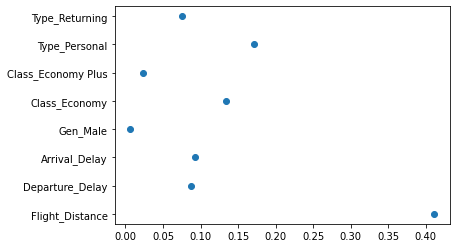

In [ ]:
#Task7 
predvars= X_test.columns
imp= rfmod.feature_importances_
plt.scatter(x=imp, y= predvars)

According to our importance graph, we can cleary see flight distance stands out comparing to the rest of the variables that can affect the satisfaction. The departure delay and arrival delay are surprisingly not the second most important predictor variables, but they share the simualr importance rating among the others. The type of personal (customer) are the second most important satisfaction indicator in this graph which I found interesting because it makes sense that returning customers who know the fligh and airline better will surely have a better expectation for the flight than the new comers, therefore the returning customers will not be dissatisfied easily since they know whhat to expect. 